In [1]:
#Download the MARIDA dataset

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1e27X7344PjW366tA6EtGWasJYZvf4MQc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=iD" -O MARIDA.zip && rm -rf /tmp/cookies.txt
from google.colab import drive
drive.mount('/content/drive')
# Set folder path

folder_path = "/content/drive/MyDrive/Colab Notebooks/DL project/data"

# List folder contents
import os
os.listdir(folder_path)

!cd "/content/drive/MyDrive/Colab Notebooks/DL project/data"
import pandas as pd
#Spectral signature extraction
hdf = pd.HDFStore("/content/drive/MyDrive/Colab Notebooks/DL project/data/dataset.h5", mode = "r")
#Slitting into train, val and test datasets
df_train = hdf.select('train')
df_val = hdf.select('val')
df_test = hdf.select('test')
print(hdf.keys())
hdf.close()

Mounted at /content/drive
['/test', '/train', '/val']


In [2]:
#Import the libraries
import numpy as np
from PIL import Image
import glob
import pandas as pd
from keras.utils import to_categorical
import os
import imageio
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf 
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling1D, Activation, ReLU,Convolution1D,Convolution1DTranspose,Lambda,Conv1D,Reshape,Dropout
from tensorflow.keras.layers import BatchNormalization, Conv1DTranspose, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow import convert_to_tensor

In [3]:
#Converting classes names into int

# Map class names to class numbers
class_dict = {
    "Wakes": 0,
    "Marine Water": 1,
    "Ship": 2,
    "Marine Debris": 3,
    "Shallow Water": 4,
    "Natural Organic Material": 5,
    "Turbid Water": 6,
    "Sparse Sargassum": 7,
    "Foam": 8,
    "Mixed Water": 9,
    "Sediment-Laden Water": 10,
    "Clouds": 11,
    "Cloud Shadows": 12,
    "Dense Sargassum": 13,
    "Waves": 14
}
df_train_classes=df_train.iloc[:,12] #exctracting classes names



In [4]:
#Converting classes names into int
#df_train
df_train=df_train.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_train
df_train["Class_Num"] = df_train_classes.map(class_dict)
# Print the resulting dataframe
print(df_train)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.102549  0.099589  0.083065  0.060977  0.054536  0.056019  0.058678   
1       0.102549  0.102169  0.085815  0.064754  0.054536  0.056019  0.058678   
2       0.101787  0.103341  0.085705  0.068320  0.054536  0.055916  0.059498   
3       0.101787  0.101699  0.085045  0.063495  0.054328  0.051480  0.052932   
4       0.101787  0.100058  0.087575  0.065488  0.054536  0.055916  0.059498   
...          ...       ...       ...       ...       ...       ...       ...   
429407  0.062488  0.058247  0.045015  0.034692  0.030850  0.030421  0.033822   
429408  0.062488  0.058247  0.040610  0.034902  0.030850  0.030421  0.033822   
429409  0.062488  0.059892  0.044465  0.034167  0.030746  0.030731  0.033924   
429410  0.062488  0.057660  0.043143  0.034692  0.030746  0.030731  0.033924   
429411  0.062488  0.059187  0.043033  0.031333  0.029706  0.029595  0.031461   

           nm842     nm865    nm1600   

In [5]:
#df_val

df_val_classes=df_val.iloc[:,12] #exctracting classes names


In [6]:
#df_val
df_val=df_val.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_val
df_val["Class_Num"] = df_val_classes.map(class_dict)
# Print the resulting dataframe
print(df_val)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.055481  0.049914  0.041615  0.035932  0.030630  0.030655  0.034099   
1       0.055481  0.056589  0.042165  0.032787  0.029487  0.030140  0.034099   
2       0.056749  0.061858  0.052387  0.039915  0.032708  0.033234  0.035740   
3       0.055481  0.065840  0.052167  0.036665  0.030526  0.030449  0.032252   
4       0.060424  0.064786  0.052717  0.040544  0.034267  0.033028  0.036253   
...          ...       ...       ...       ...       ...       ...       ...   
213097  0.065147  0.056678  0.040299  0.038716  0.035129  0.036097  0.038700   
213098  0.065147  0.054200  0.040630  0.038821  0.035129  0.036097  0.038700   
213099  0.065147  0.058448  0.042949  0.041028  0.034609  0.034443  0.037056   
213100  0.065147  0.058802  0.043833  0.040397  0.034609  0.034443  0.037056   
213101  0.064506  0.058566  0.040851  0.039136  0.032943  0.034960  0.035824   

           nm842     nm865    nm1600   

In [7]:
#df_test

df_test_classes=df_test.iloc[:,12] #exctracting classes names


In [8]:
#df_test
df_test=df_test.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_train
df_test["Class_Num"] = df_test_classes.map(class_dict)
# Print the resulting dataframe
print(df_test)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.026860  0.023231  0.012851  0.007386  0.005664  0.004713  0.004983   
1       0.026860  0.022393  0.012962  0.006331  0.005559  0.005542  0.005703   
2       0.026860  0.022393  0.013853  0.006647  0.005559  0.005542  0.005703   
3       0.026729  0.021077  0.012294  0.006225  0.004514  0.004506  0.005086   
4       0.026729  0.021795  0.012962  0.006858  0.004514  0.004506  0.005086   
...          ...       ...       ...       ...       ...       ...       ...   
194858  0.058966  0.055173  0.038499  0.029029  0.024716  0.025710  0.028051   
194859  0.058966  0.058932  0.043786  0.031758  0.026692  0.025813  0.029797   
194860  0.058966  0.055055  0.036626  0.027246  0.026692  0.025813  0.029797   
194861  0.051325  0.045773  0.038719  0.035430  0.027004  0.030975  0.033698   
194862  0.053363  0.047066  0.031339  0.024727  0.021805  0.020652  0.022200   

           nm842     nm865    nm1600   

In [9]:
#data augmentation
#Creating the dataset of cloud masks
#trainset
  #creation of the trainset of the cloud dataset
filenames = glob.glob("/content/drive/MyDrive/Colab Notebooks/DL project/data/clouds/train/*.png")
images= [Image.open(fn).convert('L') for fn in filenames]
train_clouds_array= np.dstack([np.array(im) for im in images])

#validset
  #creation of the trainset of the cloud dataset
filenames2 = glob.glob("/content/drive/MyDrive/Colab Notebooks/DL project/data/clouds/valid/*.png")
images2= [Image.open(fn).convert('L') for fn in filenames2]
valid_clouds_array = np.dstack([np.array(im) for im in images2])

#testset
  #creation of the trainset of the cloud dataset
filenames3 = glob.glob("/content/drive/MyDrive/Colab Notebooks/DL project/data/clouds/test/*.png")
images3= [Image.open(fn).convert('L') for fn in filenames3]
test_clouds_array = np.dstack([np.array(im) for im in images3])


In [10]:
#reashape train set
train_clouds_array=train_clouds_array.reshape(124416,45)#reshape to have 288*432 lines
train_clouds_array=train_clouds_array.astype(int) #make the clouds informations integers
train_clouds=np.concatenate((train_clouds_array,np.zeros((304996,45))))# train clouds ready to be concatenate with df_train

print("train_clouds:",train_clouds.shape)


train_clouds: (429412, 45)


In [11]:
#Creation of the train dataset 

df_train_labels= df_train.iloc[:, 11].values.reshape((-1, 1))  # reshape to column vector
  #train set
train=np.concatenate((df_train.iloc[:,0:11], train_clouds),axis=1)
train=np.concatenate((train,df_train_labels),axis=1)
print("train:",train.shape)
print(train)

train: (429412, 57)
[[1.02548726e-01 9.95887294e-02 8.30654576e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 [1.02548726e-01 1.02168523e-01 8.58148932e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 [1.01787083e-01 1.03341155e-01 8.57049152e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 ...
 [6.24879897e-02 5.98922931e-02 4.44645360e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.24879897e-02 5.76597191e-02 4.31431532e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.24879897e-02 5.91872670e-02 4.30330336e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [12]:
#reshape test set

test_clouds_array=test_clouds_array.reshape(124416,27)#reshape to have 288*432 lines
test_clouds_array=test_clouds_array.astype(int) #make the clouds informations integers
test_clouds=np.concatenate((test_clouds_array,np.zeros((70447,27))))

print("test_clouds:",test_clouds.shape)



test_clouds: (194863, 27)


In [13]:
#Creation of the test dataset 

df_test_labels= df_test.iloc[:, 11].values.reshape((-1, 1))  # reshape to column vector
test=np.concatenate((df_test.iloc[:,0:11], test_clouds),axis=1)
test=np.concatenate((test,df_test_labels),axis=1)
print("test:",test.shape)
print(test)

test: (194863, 39)
[[2.68599205e-02 2.32307259e-02 1.28511488e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [2.68599205e-02 2.23931037e-02 1.29624968e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [2.68599205e-02 2.23931037e-02 1.38533069e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 ...
 [5.89660630e-02 5.50550669e-02 3.66262123e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.13252988e-02 4.57734019e-02 3.87189351e-02 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]
 [5.33628315e-02 4.70657833e-02 3.13393362e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [14]:
 #reshape valid set
valid_clouds_array=valid_clouds_array.reshape(124416,23)#reshape to have 288*432 lines
valid_clouds_array=valid_clouds_array.astype(int) #make the clouds informations integers
valid_clouds=np.concatenate((valid_clouds_array,np.zeros((88686,23))))

print("valid_clouds:",valid_clouds.shape)


valid_clouds: (213102, 23)


In [15]:
#Creation of the valid dataset 
df_val_labels= df_val.iloc[:, 11].values.reshape((-1, 1))  # reshape to column vector
valid=np.concatenate((df_val.iloc[:,0:11],valid_clouds),axis=1)
valid=np.concatenate((valid,df_val_labels),axis=1)
print("valid:",valid.shape)
print(valid)

valid: (213102, 35)
[[5.54813668e-02 4.99140620e-02 4.16151099e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [5.54813668e-02 5.65888174e-02 4.21647131e-02 ... 2.55000000e+02
  2.55000000e+02 1.00000000e+00]
 [5.67486621e-02 6.18583634e-02 5.23872860e-02 ... 2.55000000e+02
  2.55000000e+02 0.00000000e+00]
 ...
 [6.51467443e-02 5.84480278e-02 4.29493301e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.51467443e-02 5.88020198e-02 4.38328125e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.45059496e-02 5.85660301e-02 4.08510752e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [18]:
train_data = train[:, :-1] # extract input features from train
train_labels = train[:, -1] # extract target labels from train
train_labels=np.asarray(train_labels).reshape(429412,1)
print(train_data.shape)
print(train_labels.shape)

val_data = valid[:, :-1] # extract input features from valid
val_labels = valid[:, -1] # extract target labels from valid
val_labels=np.asarray(val_labels).reshape(213102,1)
print(val_data.shape)
print(val_labels.shape)

test_data = test[:, :-1] # extract input features from test
test_labels = test[:, -1] # extract target labels from test
test_labels=np.asarray(test_labels).reshape(194863,1)
print(test_data)
print(test_data.shape)
print(test_labels.shape)



(429412, 56)
(429412, 1)
(213102, 34)
(213102, 1)
[[2.68599205e-02 2.32307259e-02 1.28511488e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 [2.68599205e-02 2.23931037e-02 1.29624968e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 [2.68599205e-02 2.23931037e-02 1.38533069e-02 ... 2.55000000e+02
  2.55000000e+02 2.55000000e+02]
 ...
 [5.89660630e-02 5.50550669e-02 3.66262123e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.13252988e-02 4.57734019e-02 3.87189351e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.33628315e-02 4.70657833e-02 3.13393362e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(194863, 38)
(194863, 1)


In [20]:
#PC of train data
pca = PCA(n_components=1)
pca_result = pca.fit_transform(train_data)


print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.99968808]


In [21]:
#PC of test data
pca_test = PCA(n_components=1)
pca_test_result = pca_test.fit_transform(test_data)


print('Explained variation per principal component: {}'.format(pca_test.explained_variance_ratio_))

Explained variation per principal component: [0.99941893]


In [22]:
#PC of val data
pca_val = PCA(n_components=1)
pca_val_result = pca_val.fit_transform(val_data)

print('Explained variation per principal component: {}'.format(pca_val.explained_variance_ratio_))

Explained variation per principal component: [0.99942456]


In [23]:
print(pca_result.shape)

(429412, 1)


In [24]:
from sklearn.preprocessing import MinMaxScaler
#normalization
# Normalize the input data
scaler = MinMaxScaler()
pca_result_normalized = scaler.fit_transform(pca_result)

# Normalize the test data using the same scaler
pca_test_result_normalized = scaler.transform(pca_test_result)

In [26]:
#Fully connected NN
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(1024,input_shape=(429412, 1),activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(300,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(56,activation="relu"))
model.add(Dense(15,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")#explain why this loss fctn

Epoch 1/3
13420/13420 [==============================] - 1452s 108ms/step - loss: 1.6170 - accuracy: 0.4147 - val_loss: 330.2466 - val_accuracy: 0.1087
Epoch 2/3
13420/13420 [==============================] - 1376s 102ms/step - loss: 1.6074 - accuracy: 0.4148 - val_loss: 230.9720 - val_accuracy: 0.2590
Epoch 3/3
6090/6090 [==============================] - 154s 25ms/step - loss: 1.6175 - accuracy: 0.4774
loss :  1.6174639463424683
acc :  0.4774482548236847


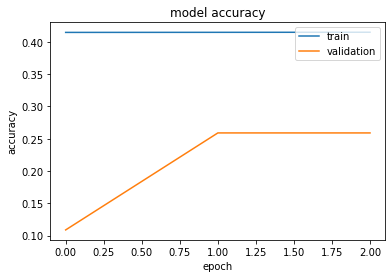

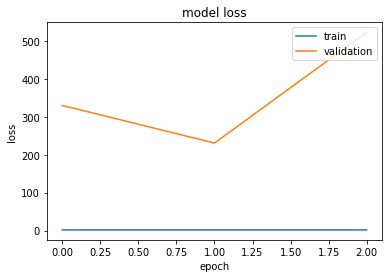

In [28]:
#train the FCNN
import matplotlib.pyplot as plt


history=model.fit(pca_result_normalized,train_labels,batch_size=32,epochs=3,validation_data=(pca_val_result,val_labels))

loss,acc=model.evaluate(pca_test_result_normalized,test_labels)

print("loss : ", loss)
print("acc : ", acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()